<a href="https://colab.research.google.com/github/thoughtsociety/colab-notebooks/blob/master/Facial_Emotion_Detection_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Emotion Detection with Deep Learning

### Will experiment with the cv2 library
### and the model built by Priya Dwivedi from her [great medium post](https://towardsdatascience.com/face-detection-recognition-and-emotion-detection-in-8-lines-of-code-b2ce32d4d5de)

### Mount GDrive for assets

Must be run every time the notebook is initialized

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
# drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Do our imports

#### There is also a patch for google colab to use cv2_imshow correctly in a notebook

In [2]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# import face_recognition
import keras
from keras.models import load_model
import cv2
import warnings
import time
from google.colab.patches import cv2_imshow # fixes incompatibility of cv2 and jupyter
warnings.filterwarnings('ignore')
face_path = "/content/"
model_path = "/content/drive/My Drive/Colab Notebooks/models/"
gdrive_path = "/content/drive/My Drive/Colab Notebooks/"


Using TensorFlow backend.


In [0]:
from imutils import build_montages

In [0]:
# We had a bunch of images saved on gdrive as a zip so we needed to unzip them locally on our colab instance
!unzip /content/drive/'My Drive'/faces/trump_16_faces2.zip

In [0]:
A

In [0]:
# This is where the emotion equates to a predicted class value
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

In [0]:
# Load in the face emotional model provided by Priya Dwivedi http://www.deeplearninganalytics.org/
# The model was trained on fer2013 labeled face emotion image data set
model = load_model(model_path+"model_v6_23.hdf5")

## Emotion Detection Function

Function to do the emotion detection in one cell

**Pass in the image**

**Resize image : This model prefers 48x48 pixel grayscale images**

In [0]:
# The image lists for experimentation

# img_list = ['39.jpg','happy.jpg','suprise-guy.jpg','125.jpg','140.jpg','16.jpg','142.jpg','4.jpg','disgust-man-2.jpeg','angry-man-1.jpg','1950s-sad-boy.jpg','fearful-woman-1.jpg']
# img_list_2 = ['happy.jpg','sad2.jpg','surprise.jpg','fear.jpg']
# img_list_3 = ['125.jpg','140.jpg','16.jpg','142.jpg','4.jpg']
# img_list_4 = ['trump-anger-1.png','trump-fear-1.png','trump-neutral1.png']
# img_list_all = img_list+img_list_2

In [0]:
# Trump Face List
trump_img_list = ['trump_anger1.png','trump_anger2.png','trump_anger3.png','trump_anger4.png',
                  'trump_disgust2.png','trump_fear1.png','trump_fear2.png','trump_fear3.png','trump_fear4.png',
                  'trump_happy1.png','trump_happy2.png','trump_neutral1.png','trump_sad1.png','trump_sad2.png',
                  'trump_surprise1.png','trump_surprise2.png']



In [0]:
def emotion_detection(image):
  #resized_image = cv2.resize(image, None, (48,48),interpolation=cv2.INTER_AREA)
  resized_image = cv2.resize(image, (48,48),interpolation=cv2.INTER_AREA)
  #cv2_imshow(resized_image)
# Reshape for 4D convolution input to model
  reshaped_resized_image = np.reshape(resized_image,[1,48,48,1])
# Do the prediction based on the emotional model
  predicted_class = np.argmax(model.predict(reshaped_resized_image))
# Get the emotion string from the dictionary with predicted_class as index
  label_map = dict((v,k) for k,v in emotion_dict.items()) 
  predicted_label = label_map[predicted_class]
  #print('predicted class = ',predicted_class)
# Return the emotion string
  return(predicted_label)

In [0]:
# Loop through the image list
# Build a list of images that can be iterated for plotting as an array
# Build a list of emotions that go along with the list
# Could use a multi-index df - 

In [0]:
from imutils import build_montages

list_of_images = []

# text label setup for cv2.put_Text()
color = (255,255,255)
thickness = 1
font_Scale = .7

MONTAGE_FILENAME = gdrive_path+'emotion_montage.jpg'

for i in trump_img_list:
  cur_image = i

  color_image = cv2.imread(face_path+cur_image)
  bw_image = cv2.imread(face_path+cur_image,cv2.IMREAD_GRAYSCALE)
# Call emotion_detection
  emotion = emotion_detection(bw_image)
# After getting the emotions, resize the original color image to present in a montage later
  color_imager = cv2.resize(color_image, (96,96),interpolation=cv2.INTER_AREA)
# use CV2 to put the current emotion text over the images (the emotion strings)
  cv2.putText(color_imager, emotion, (2, 20), cv2.FONT_HERSHEY_SIMPLEX, font_Scale, 
              color, thickness,cv2.LINE_AA)
# Build the image list
  list_of_images.append(color_imager)




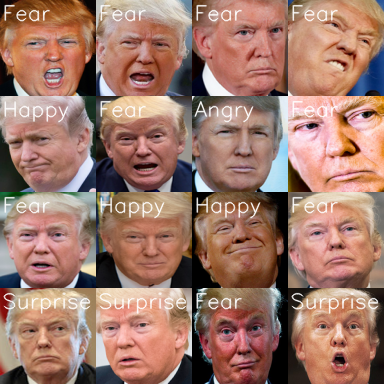

In [10]:
montages = build_montages(list_of_images, (96, 96), (4, 4))[0]

cv2_imshow(montages)
cv2.waitKey(0)
cv2.destroyAllWindows()

# loop over the montages and display each of them
# for montage in montages:
#   print(montage)
#   cv2.imshow("Montage", montage)
# 	#cv2.waitKey(0)

In [36]:
cv2.imwrite(MONTAGE_FILENAME, montages)

True